# PyTorch Tensors

In [7]:
%pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [8]:
import torch

In [9]:
#creating 2D tensor with 5 rows and 3 cols
z = torch.zeros(5,3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [10]:
z = torch.ones((5,3), dtype = torch.int16)
print(z)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [11]:
torch.manual_seed(1729)
r1 = torch.rand(3,2)
print("A random tensor")
print(r1)

r2 = torch.rand(3,2)
print("\n Another different random tensor")
print(r2)

torch.manual_seed(1729)
r3 = torch.rand(3,2)
print("\n Should match r1: ")
print(r3)

A random tensor
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736],
        [0.4216, 0.0691]])

 Another different random tensor
tensor([[0.2332, 0.4047],
        [0.2162, 0.9927],
        [0.4128, 0.5938]])

 Should match r1: 
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736],
        [0.4216, 0.0691]])


In [12]:
ones = torch.ones(2,3)
print(ones)

twos = torch.ones(2,3)*2
print(twos)

threes = ones+twos
print(threes)
print(threes.shape)

r1 = torch.rand(2,3)
r2 = torch.rand(3,2)
r3 = r1 + r2

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

In [13]:
r = torch.rand(2,2) - 0.5*2
print("A random matrix, r:")
print(r)

# common math ops
print("\nAbs val of r")
print(torch.abs(r))

#trigo fns
print("\nInverse Sine")
print(torch.asin(r))

#lin alg - determinant and SVD
print("\nDeterminant")
print(torch.det(r))
print("\nSVD")
print(torch.svd(r))

#statistical and aggregate operations
print("\navg and SD")
print(torch.std_mean(r))
print("\nMax val")
print(torch.max(r))

A random matrix, r:
tensor([[-0.3071, -0.8297],
        [-0.8616, -0.5241]])

Abs val of r
tensor([[0.3071, 0.8297],
        [0.8616, 0.5241]])

Inverse Sine
tensor([[-0.3122, -0.9785],
        [-1.0383, -0.5516]])

Determinant
tensor(-0.5538)

SVD
torch.return_types.svd(
U=tensor([[-0.6461, -0.7633],
        [-0.7633,  0.6461]]),
S=tensor([1.2684, 0.4366]),
V=tensor([[ 0.6749, -0.7379],
        [ 0.7379,  0.6749]]))

avg and SD
(tensor(0.2639), tensor(-0.6306))

Max val
tensor(-0.3071)


# A simple Pytorch Model

In [14]:
import torch                     # for all things PyTorch
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function

In [15]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        # 3 input image channels (RGB), 8 output channels, 5x5 convolution kernel
        self.conv1 = nn.Conv2d(3, 8, 5)
        self.conv2 = nn.Conv2d(8, 32, 5)
        
        # Adjusting dimensions according to new conv layers
        self.fc1 = nn.Linear(32 * 5 * 5, 150)  # Adjusted fully connected layer
        self.fc2 = nn.Linear(150, 100)
        self.fc3 = nn.Linear(100, 5)  # Final output classes changed to 5

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # Final output layer
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # Exclude batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [16]:
net = LeNet()
print(net)

# Create an input tensor for a batch of 1 RGB image (3 channels, 32x32)
input = torch.rand(1, 3, 32, 32)   
print('\nImage batch shape:')
print(input.shape)

# Pass the input through the network
output = net(input)
print('\nRaw output:')
print(output)

LeNet(
  (conv1): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=150, bias=True)
  (fc2): Linear(in_features=150, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=5, bias=True)
)

Image batch shape:
torch.Size([1, 3, 32, 32])

Raw output:
tensor([[-0.0937,  0.0764, -0.0106,  0.0869,  0.0138]],
       grad_fn=<AddmmBackward0>)


In [ ]:
torch.save(net.state_dict(), "A_Simple_PyTorch_Model_LeNet_model_weights.pth")
print("LeNet model weights saved successfully!")


# Dataset and DataLoader

In [17]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [18]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Grayscale images have one channel
])

In [19]:
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                             download=True, transform=transform)

In [20]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8,
                                          shuffle=True, num_workers=4)

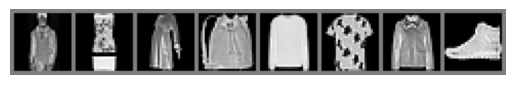

  Pullover T-shirt/top      Dress        Bag   Pullover T-shirt/top       Coat Ankle boot


In [21]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

def imshow(img):
    img = img * 0.5 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')  # Convert to grayscale
    plt.axis('off')  # Remove axes for better visualization
    plt.show()

# Get a batch of training data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print corresponding labels
print(' '.join('%10s' % classes[labels[j]] for j in range(8)))

# A simple pyTorch Training Loop

In [22]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Adjusted for grayscale images
])

# Load the FashionMNIST dataset
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                             download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                            download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=8,
                                         shuffle=False, num_workers=4)

# Define class labels for FashionMNIST
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')


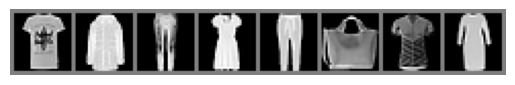

T-shirt/top       Coat    Trouser      Dress    Trouser        Bag T-shirt/top      Dress


In [24]:
# Function to visualize images
def imshow(img):
    img = img * 0.5 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')  # Convert to grayscale
    plt.axis('off')
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join('%10s' % classes[labels[j]] for j in range(8)))

In [25]:
# Define the CNN Model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)  # 1 input channel for grayscale
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # Adjusted size after pooling
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # 10 output classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)  # Flatten tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize network, loss function, and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)  # Using Adam optimizer



In [26]:
# Train the network
num_epochs = 5
for epoch in range(num_epochs):  
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if i % 1000 == 999:  # Print loss every 1000 mini-batches
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 1000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1, 1000] loss: 0.820
[1, 2000] loss: 0.566
[1, 3000] loss: 0.495
[1, 4000] loss: 0.454
[1, 5000] loss: 0.412
[1, 6000] loss: 0.392
[1, 7000] loss: 0.397
[2, 1000] loss: 0.355
[2, 2000] loss: 0.348
[2, 3000] loss: 0.341
[2, 4000] loss: 0.336
[2, 5000] loss: 0.351
[2, 6000] loss: 0.342
[2, 7000] loss: 0.334
[3, 1000] loss: 0.323
[3, 2000] loss: 0.303
[3, 3000] loss: 0.295
[3, 4000] loss: 0.310
[3, 5000] loss: 0.318
[3, 6000] loss: 0.280
[3, 7000] loss: 0.299
[4, 1000] loss: 0.276
[4, 2000] loss: 0.278
[4, 3000] loss: 0.277
[4, 4000] loss: 0.286
[4, 5000] loss: 0.279
[4, 6000] loss: 0.272
[4, 7000] loss: 0.279
[5, 1000] loss: 0.252
[5, 2000] loss: 0.261
[5, 3000] loss: 0.254
[5, 4000] loss: 0.278
[5, 5000] loss: 0.275
[5, 6000] loss: 0.258
[5, 7000] loss: 0.270
Finished Training


In [27]:

# Evaluate model accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f} %')


Accuracy of the network on the 10000 test images: 88.46 %


In [28]:
# Save the model weights
torch.save(net.state_dict(), "1_Introduction_to_PyTorch_net_model_weights.pth")
print("Model weights saved successfully!")

NameError: name 'model' is not defined

# Introduction to PyTorch Tensors

In [ ]:
import torch
import math

In [ ]:
x = torch.empty(3, 4)
print(type(x))
print(x)

In [ ]:
zeros = torch.zeros(3, 4)
print("Zeros Tensor:\n", zeros)

ones = torch.ones(3, 4)
print("\nOnes Tensor:\n", ones)

torch.manual_seed(2025)  
random = torch.rand(3, 4) 
print("\nRandom Tensor:\n", random)

In [ ]:
torch.manual_seed(2025)
random1 = torch.rand(3, 4)  
print("Random Tensor 1:\n", random1)

random2 = torch.rand(3, 4)
print("\nRandom Tensor 2:\n", random2)

torch.manual_seed(2025)
random3 = torch.rand(3, 4)
print("\nRandom Tensor 3 (after resetting seed):\n", random3)

random4 = torch.rand(3, 4)
print("\nRandom Tensor 4:\n", random4)


In [ ]:
x = torch.empty(3, 3, 4)
print(x.shape)
print(x)

empty_like_x = torch.empty_like(x)
print(empty_like_x.shape)
print(empty_like_x)

zeros_like_x = torch.zeros_like(x)
print(zeros_like_x.shape)
print(zeros_like_x)

ones_like_x = torch.ones_like(x)
print(ones_like_x.shape)
print(ones_like_x)

rand_like_x = torch.rand_like(x)
print(rand_like_x.shape)
print(rand_like_x)

In [ ]:
some_constants = torch.tensor([[1.41421, 2.30258], [0.57721, 3.14159]])  
print("Some Constants:\n", some_constants)

some_integers = torch.tensor((5, 11, 23, 29, 37, 41, 47, 53))
print("\nSome Integers (Primes):\n", some_integers)

more_integers = torch.tensor(((1, 3, 5), [2, 4, 6]))
print("\nMore Integers:\n", more_integers)


In [ ]:
a = torch.ones((3, 4), dtype=torch.int32)
print("Tensor a (Ones, int32):\n", a)

b = torch.rand((3, 4), dtype=torch.float32) * 50.0
print("\nTensor b (Random values scaled to 50, float32):\n", b)

c = b.to(torch.int64)
print("\nTensor c (Converted to int64):\n", c)


In [ ]:
ones = torch.zeros(3, 3) + 3  
twos = torch.ones(3, 3) * 4   
threes = (torch.ones(3, 3) * 11 - 1) / 2  
fours = twos ** 2  
sqrt2s = twos ** 0.5  

print("Ones (Filled with 3s):\n", ones)
print("\nTwos (Filled with 4s):\n", twos)
print("\nThrees (Filled with 5s):\n", threes)
print("\nFours (4^2 = 16):\n", fours)
print("\nSquare Root of Twos (sqrt(4) = 2):\n", sqrt2s)

In [ ]:
powers2 = twos ** torch.tensor([[2, 3, 4], [5, 6, 7], [8, 9, 10]])
print("Powers of Twos:\n", powers2)

fives = ones + fours  
print("\nFives (5 + 9):\n", fives)

dozens = threes * fours  
print("\nDozens (6 * 9):\n", dozens)

In [ ]:
a = torch.rand(3, 2)
b = torch.rand(2, 3)

print(a * b)

In [ ]:
rand = torch.rand(3, 5)
doubled = rand * (torch.ones(1, 5) * 3)

print("Random Tensor:\n", rand)
print("\nScaled Tensor (Multiplied by 3):\n", doubled)


In [ ]:
a = torch.ones(5, 4, 3)
b = a * torch.rand(4, 3)
print("Tensor b (Broadcasted over dim 1):\n", b)
c = a * torch.rand(4, 1)  
print("\nTensor c (Broadcasted over 3rd dim):\n", c)
d = a * torch.rand(1, 3)  
print("\nTensor d (Broadcasted over 2nd dim):\n", d)


In [ ]:
a =     torch.ones(4, 3, 2)

b = a * torch.rand(4, 3)    # dimensions must match last-to-first

c = a * torch.rand(   2, 3) # both 3rd & 2nd dims different

d = a * torch.rand((0, ))   # can't broadcast with an empty tensor

In [ ]:
import torch
import math

a = torch.rand(3, 5) * 4 - 2  
print('Common functions:')
print("Absolute:\n", torch.abs(a))
print("Ceil:\n", torch.ceil(a))
print("Floor:\n", torch.floor(a))
print("Clamped (-1 to 1):\n", torch.clamp(a, -1, 1))

angles = torch.tensor([0, math.pi / 6, math.pi / 3, 2 * math.pi / 3])
sines = torch.sin(angles)
inverses = torch.asin(sines)
print('\nSine and arcsine:')
print("Angles:\n", angles)
print("Sine values:\n", sines)
print("Inverse Sine (Arcsin):\n", inverses)

print('\nBitwise XOR:')
b = torch.tensor([3, 12, 25])
c = torch.tensor([5, 15, 30])
print(torch.bitwise_xor(b, c))

print('\nBroadcasted, element-wise equality comparison:')
d = torch.tensor([[1., 2., 3.], [4., 5., 6.]])
e = torch.ones(1, 3)  
print(torch.eq(d, e))  

print('\nReduction ops:')
print("Max value:\n", torch.max(d))         
print("Max value extracted:\n", torch.max(d).item())  
print("Mean (average):\n", torch.mean(d))   
print("Standard deviation:\n", torch.std(d)) 
print("Product of all elements:\n", torch.prod(d)) 
print("Unique elements:\n", torch.unique(torch.tensor([3, 3, 4, 4, 5, 6])))  

v1 = torch.tensor([1., 2., 3.])  
v2 = torch.tensor([4., 5., 6.])  
m1 = torch.rand(3, 3)  
m2 = torch.tensor([[2., 0., 0.], [0., 2., 0.], [0., 0., 2.]])  

print('\nVectors & Matrices:')
print("Cross Product v1 x v2:\n", torch.cross(v1, v2))
print("Random Matrix m1:\n", m1)
m3 = torch.matmul(m1, m2)
print("Matrix Multiplication (m1 * 2I):\n", m3)  
print("SVD Decomposition of m3:\n", torch.svd(m3))  


In [ ]:

a = torch.tensor([0, math.pi / 6, math.pi / 3, 2 * math.pi / 3])
print('a:')
print(a)
print("Sine of a (New Tensor):\n", torch.sin(a)) 
print("a remains unchanged:\n", a)  

b = torch.tensor([0, math.pi / 6, math.pi / 3, 2 * math.pi / 3])
print('\nb:')
print(b)
print("Sine of b (In-place operation):\n", torch.sin_(b))  
print("b after in-place operation:\n", b)  


In [ ]:
a = torch.ones(3, 3)  
b = torch.rand(3, 3) * 5  

print("Before:")
print("Tensor a:\n", a)
print("Tensor b:\n", b)

print("\nAfter adding:")
print(a.add_(b)) 
print("Tensor a (modified):\n", a)
print("Tensor b (unchanged by addition):\n", b)

print("\nAfter multiplying:")
print(b.mul_(b))  
print("Tensor b (modified):\n", b)


In [ ]:
a = torch.rand(3, 3) * 10 
b = torch.rand(3, 3) * 5   
c = torch.zeros(3, 3)      

old_id = id(c)

print("Initial Tensor c (zeros):\n", c)

d = torch.matmul(a, b, out=c)
print("\nTensor c after matmul(a, b, out=c):\n", c)  

assert c is d  
assert id(c) == old_id  

torch.rand(3, 3, out=c)  
print("\nTensor c after torch.rand(3, 3, out=c):\n", c)  

assert id(c) == old_id  


In [ ]:
a = torch.ones(3, 3)
b = a  

a[1][2] = 999  

print("Tensor a after modification:\n", a)
print("\nTensor b (shares memory with a, so it also changes):\n", b)

In [ ]:

a = torch.ones(3, 3)
b = a.clone()

assert b is not a  
print("Equality Check (Same Contents but Different Objects):\n", torch.eq(a, b))

a[1][2] = 777  

print("\nTensor a after modification:\n", a)
print("\nTensor b (Remains Unchanged as an Independent Copy):\n", b)


In [ ]:
a = torch.rand(3, 3, requires_grad=True) 
print("Tensor a (Original, requires_grad=True):\n", a)

b = a.clone()
print("\nTensor b (Clone of a, still requires_grad=True):\n", b)

c = a.detach().clone()
print("\nTensor c (Detached & Cloned, requires_grad=False):\n", c)

print("\nTensor a (After operations, remains unchanged):\n", a)

In [ ]:
if torch.cuda.is_available():
    print('We have a GPU!')
else:
    print('Sorry, CPU only.')

In [ ]:
if torch.cuda.is_available():
    gpu_rand = torch.rand(2, 2, device='cuda')
    print(gpu_rand)
else:
    print('Sorry, CPU only.')

In [ ]:
if torch.cuda.is_available():
    my_device = torch.device('cuda')
else:
    my_device = torch.device('cpu')
print('Device: {}'.format(my_device))

x = torch.rand(2, 2, device=my_device)
print(x)

In [ ]:
y = torch.rand(3, 2)
y = y.to(my_device)

In [ ]:
a = torch.rand(3, 128, 128)  
b = a.unsqueeze(0)
print("Shape of a (Before unsqueeze):", a.shape)  
print("Shape of b (After unsqueeze at dim=0):", b.shape)  

In [ ]:
c = torch.rand(1, 1, 1, 1, 1)
print(c)

In [ ]:
a = torch.rand(1, 15)  
print("Shape of a (Before squeeze):", a.shape)
print("Tensor a:\n", a)

b = a.squeeze(0)
print("\nShape of b (After squeeze):", b.shape)  
print("Tensor b:\n", b)

c = torch.rand(3, 3)  
print("\nShape of c (Before squeeze):", c.shape)

d = c.squeeze(0)
print("Shape of d (After squeeze, should be the same as c):", d.shape)


In [ ]:
a = torch.ones(5, 4, 3)
b = torch.rand(4)  
c = b.unsqueeze(1) 
print("Shape of c after unsqueeze:\n", c.shape)
print("\nResult of a * c:\n", a * c)


In [ ]:
batch_me = torch.rand(3, 128, 128)
print("Shape of batch_me (Before unsqueeze):", batch_me.shape)

batch_me.unsqueeze_(0)  
print("Shape of batch_me (After unsqueeze at dim=0):", batch_me.shape)


In [ ]:
output3d = torch.rand(8, 15, 15)  
print("Shape of output3d (Original 3D tensor):", output3d.shape)

input1d = output3d.reshape(8 * 15 * 15)
print("Shape of input1d (After reshape to 1D):", input1d.shape)

print("Using torch.reshape:", torch.reshape(output3d, (8 * 15 * 15,)).shape)

In [ ]:
import numpy as np

numpy_array = np.ones((3, 4))
print("NumPy Array:\n", numpy_array)

pytorch_tensor = torch.from_numpy(numpy_array)
print("\nPyTorch Tensor (From NumPy Array):\n", pytorch_tensor)

In [ ]:
pytorch_rand = torch.rand(3, 4)
print("\nPyTorch Random Tensor:\n", pytorch_rand)

numpy_rand = pytorch_rand.numpy()
print("\nNumPy Array (From PyTorch Random Tensor):\n", numpy_rand)

In [ ]:
numpy_array[2, 2] = 99
print("\nModified NumPy Array (Reflected in PyTorch Tensor):\n", pytorch_tensor)

pytorch_rand[1, 3] = 42
print("\nModified PyTorch Tensor (Reflected in NumPy Array):\n", numpy_rand)


# Autograd

In [ ]:
%matplotlib inline

In [ ]:
import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [ ]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)

In [ ]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

In [ ]:
print(b)

In [ ]:
c = 3 * b
print(c)

d = c + 2
print(d)

In [ ]:
out = d.sum()
print(out)

In [ ]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

In [ ]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

In [ ]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()
        
        self.layer1 = torch.nn.Linear(1000, 100)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(100, 10)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x
    
some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

In [ ]:
print(model.layer2.weight[0][0:10]) # just a small slice
print(model.layer2.weight.grad)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

prediction = model(some_input)

loss = (ideal_output - prediction).pow(2).sum()
print(loss)

In [ ]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

In [ ]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

In [ ]:
model.train()
for i in range(0, 5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()
    
if model.layer2.weight.grad is not None:
    print(f"Gradients before zeroing:\n{model.layer2.weight.grad[0][:10]}")
else:
    print("Gradients are None. Ensure that loss.backward() has been called.")

optimizer.zero_grad()

if model.layer2.weight.grad is not None:
    print(f"Gradients after zeroing:\n{model.layer2.weight.grad[0][:10]}")
else:
    print("Gradients are None after zeroing.")

In [ ]:
# Save the model weights
torch.save(TinyModel.state_dict(), "3_Fundamentals_of_Autograd_model_weights.pth")
print("Model weights saved successfully!")

In [ ]:
a = torch.ones(2, 3, requires_grad=True)
print(a)

b1 = 2 * a
print(b1)

a.requires_grad = False
b2 = 2 * a
print(b2)

In [ ]:
a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = a + b
print(c1)

with torch.no_grad():
    c2 = a + b

print(c2)

c3 = a * b
print(c3)

In [ ]:
def add_tensors1(x, y):
    return x + y

@torch.no_grad()
def add_tensors2(x, y):
    return x + y


a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = add_tensors1(a, b)
print(c1)

c2 = add_tensors2(a, b)
print(c2)

In [ ]:
x = torch.rand(5, requires_grad=True)
y = x.detach()

print(x)
print(y)

In [ ]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
torch.sin_(a)

In [ ]:
device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True
    
x = torch.randn(2, 3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
    for _ in range(1000):
        z = (z / x) * y
        
print(prf.key_averages().table(sort_by='self_cpu_time_total'))

In [ ]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

In [ ]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float) # stand-in for gradients
y.backward(v)

print(x.grad)

In [ ]:
def exp_adder(x, y):
    return 2 * x.exp() + 3 * y

inputs = (torch.rand(1), torch.rand(1)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

In [ ]:
inputs = (torch.rand(3), torch.rand(3)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

In [ ]:
def do_some_doubling(x):
    y = x * 2
    while y.data.norm() < 1000:
        y = y * 2
    return y

inputs = torch.randn(3)
my_gradients = torch.tensor([0.1, 1.0, 0.0001])
torch.autograd.functional.vjp(do_some_doubling, inputs, v=my_gradients)

# Building Models in PyTorch

In [34]:
import torch.nn as nn

class TinyModel(torch.nn.Module):
    
    def __init__(self):
        super(TinyModel, self).__init__()
        self.linear1 = nn.Linear(128, 256)  
        self.activation1 = nn.ReLU()
        self.linear2 = nn.Linear(256, 64)  
        self.activation2 = nn.Tanh()
        self.linear3 = nn.Linear(64, 10)    
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        x = self.activation2(x)
        x = self.linear3(x)
        x = self.softmax(x)
        return x

tinymodel = TinyModel()

print('The model:')
print(tinymodel)

print('\n\nJust one layer:')
print(tinymodel.linear2)

print('\n\nModel params:')
for param in tinymodel.parameters():
    print(param)

print('\n\nLayer params:')
for param in tinymodel.linear2.parameters():
    print(param)

The model:
TinyModel(
  (linear1): Linear(in_features=128, out_features=256, bias=True)
  (activation1): ReLU()
  (linear2): Linear(in_features=256, out_features=64, bias=True)
  (activation2): Tanh()
  (linear3): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


Just one layer:
Linear(in_features=256, out_features=64, bias=True)


Model params:
Parameter containing:
tensor([[ 0.0748,  0.0327,  0.0583,  ...,  0.0647, -0.0683,  0.0183],
        [ 0.0868,  0.0550, -0.0749,  ..., -0.0054,  0.0654, -0.0051],
        [-0.0789,  0.0524,  0.0680,  ...,  0.0266,  0.0134, -0.0852],
        ...,
        [ 0.0792,  0.0504, -0.0587,  ..., -0.0461,  0.0622, -0.0158],
        [ 0.0675, -0.0780, -0.0192,  ..., -0.0528, -0.0005, -0.0473],
        [-0.0342, -0.0225,  0.0285,  ..., -0.0624, -0.0499, -0.0038]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0781, -0.0583,  0.0067,  0.0140, -0.0712,  0.0702, -0.0421, -0.0106,
         0.0439, -0.0632, -0.0705,

In [35]:
linear_layer = nn.Linear(in_features=4, out_features=3)
input_tensor = torch.rand(2, 4)
print('Input:')
print(input_tensor)

print('\nWeight and Bias Parameters:')
for name, param in linear_layer.named_parameters():
    print(f'{name}:')
    print(param)

output_tensor = linear_layer(input_tensor)

print('\nOutput Tensor:')
print(output_tensor)

Input:
tensor([[0.7007, 0.6001, 0.9865, 0.2452],
        [0.0230, 0.9083, 0.0196, 0.4573]])

Weight and Bias Parameters:
weight:
Parameter containing:
tensor([[ 0.2640, -0.4836,  0.2523,  0.4748],
        [ 0.3956, -0.4835,  0.0298,  0.1438],
        [ 0.1239, -0.4689,  0.3024,  0.2441]], requires_grad=True)
bias:
Parameter containing:
tensor([ 0.0383, -0.4938,  0.3773], requires_grad=True)

Output Tensor:
tensor([[ 0.2983, -0.4420,  0.5408],
        [-0.1729, -0.8575,  0.0718]], grad_fn=<AddmmBackward0>)


In [36]:
torch.save(tinymodel.state_dict(), "LeNet_model_weights.pth")
print("Tiny model weights saved successfully!")


Tiny model weights saved successfully!


In [ ]:
import torch.functional as F


class LeNet(torch.nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=5) 
        self.conv2 = nn.Conv2d(8, 20, kernel_size=3) 
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(20 * 6 * 6, 150)  
        self.fc2 = nn.Linear(150, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))  
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [33]:
class LSTMTagger(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)

        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)

        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(embeds)
        tag_space = self.hidden2tag(lstm_out)
        tag_scores = F.log_softmax(tag_space, dim=2)
        return tag_scores

In [ ]:
my_tensor = torch.rand(1, 8, 8)
print(my_tensor)

maxpool_layer = torch.nn.MaxPool2d(4, stride=2)
print(maxpool_layer(my_tensor))

In [ ]:
my_tensor = torch.rand(1, 6, 6) * 15 + 10  
print(my_tensor)

print(my_tensor.mean())

norm_layer = torch.nn.BatchNorm1d(6)  
normed_tensor = norm_layer(my_tensor)
print(normed_tensor)

print(normed_tensor.mean())

In [ ]:
my_tensor = torch.rand(1, 6, 6)  

dropout = torch.nn.Dropout(p=0.2)  
print(dropout(my_tensor))
print(dropout(my_tensor))

In [37]:
torch.save(net.state_dict(), "4_Building_Models_with_PyTorch_model_weights.pth")
print("LeNet model weights saved successfully!")


LeNet model weights saved successfully!


# PyTorch TensorBoard Support

In [ ]:
pip install torch torchvision matplotlib tensorboard

In [ ]:
# PyTorch model and training necessities
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Image datasets and image manipulation
import torchvision
import torchvision.transforms as transforms

# Image display
import matplotlib.pyplot as plt
import numpy as np

# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter

In [ ]:
# Gather datasets and prepare them for consumption
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.4,), (0.4,))])

# Store separate training and validations splits in ./data
training_set = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
validation_set = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)

training_loader = torch.utils.data.DataLoader(training_set,
                                              batch_size=8,
                                              shuffle=True,
                                              num_workers=4)


validation_loader = torch.utils.data.DataLoader(validation_set,
                                                batch_size=8,
                                                shuffle=False,
                                                num_workers=4)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [ ]:
# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img * 0.5 + 0.5       # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [ ]:
# Extract a batch of 4 images
dataiter = iter(training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)  
matplotlib_imshow(img_grid, one_channel=True)

In [ ]:
writer = SummaryWriter('runs/fashion_mnist_exp_v2') 

writer.add_image('Six Fashion-MNIST Images', img_grid)  
writer.flush()



In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3)  
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 20, 3)  
        
        self.fc1 = nn.Linear(20 * 5 * 5, 150)  
        self.fc2 = nn.Linear(150, 100) 
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)   
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0005)  

In [ ]:
print(len(validation_loader))
for epoch in range(3):  
    running_loss = 0.0

    for i, data in enumerate(training_loader, 0):
        # Basic training loop
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 500 == 499:  
            print('Batch {}'.format(i + 1))
            running_vloss = 0.0
            
            net.eval() 
            with torch.no_grad():  
                for j, vdata in enumerate(validation_loader, 0):
                    vinputs, vlabels = vdata
                    voutputs = net(vinputs)
                    vloss = criterion(voutputs, vlabels)
                    running_vloss += vloss.item()
            
            net.train()  
            
            avg_loss = running_loss / 500  
            avg_vloss = running_vloss / len(validation_loader)
            
            writer.add_scalars('Training vs. Validation Loss',
                            {'Training': avg_loss, 'Validation': avg_vloss},
                            epoch * len(training_loader) + i)

            running_loss = 0.0
print('Finished Training')

writer.flush()

In [ ]:
# Save the model weights
torch.save(net.state_dict(), "5_PyTorch_TensorBoard_Support_model_weights.pth")
print("Model weights saved successfully!")

In [ ]:
# Again, grab a single mini-batch of images
dataiter = iter(training_loader)
images, labels = next(dataiter)

# add_graph() will trace the sample input through your model,
# and render it as a graph.
writer.add_graph(net, images)
writer.flush()

In [ ]:
# Select a random subset of data and corresponding labels
def select_n_random(data, labels, n=200):
    assert len(data) == len(labels)

    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

# Extract a random subset of data
images, labels = select_n_random(training_set.data, training_set.targets)

# get the class labels for each image
class_labels = [classes[label] for label in labels]

# log embeddings
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images.unsqueeze(1))
writer.flush()
writer.close()

# Training with PyTorch

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

from torch.utils.tensorboard import SummaryWriter
from datetime import datetime

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4,), (0.4,))  
])

training_set = torchvision.datasets.FashionMNIST('./dataset', train=True, transform=transform, download=True)
validation_set = torchvision.datasets.FashionMNIST('./dataset', train=False, transform=transform, download=True)

training_loader = torch.utils.data.DataLoader(training_set, batch_size=8, shuffle=True, num_workers=4) 
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=8, shuffle=False, num_workers=4)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

print('Training set has {} instances'.format(len(training_set)))
print('Validation set has {} instances'.format(len(validation_set)))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img * 0.5 + 0.5  
    
    npimg = img.numpy()
    
    if one_channel:
        plt.imshow(npimg, cmap="inferno")  
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(training_loader)
images, labels = next(dataiter)  

img_grid = torchvision.utils.make_grid(images, nrow=4)  
matplotlib_imshow(img_grid, one_channel=False)  
print('  '.join(classes[labels[j]] for j in range(len(labels))))  

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3)  
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 20, 3)  
        self.fc1 = nn.Linear(20 * 5 * 5, 150)  
        self.fc2 = nn.Linear(150, 100) 
        self.fc3 = nn.Linear(100, 10)  

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  

        x = x.view(x.size(0), -1)  

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

model = GarmentClassifier()


In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()

dummy_outputs = torch.rand(8, 10)  
dummy_labels = torch.tensor([2, 7, 1, 5, 3, 8, 6, 0])  

print(dummy_outputs)
print(dummy_labels)

loss = loss_fn(dummy_outputs, dummy_labels)
print('Total loss for this batch: {:.4f}'.format(loss.item())) 

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, betas=(0.9, 0.999))  # Changed optimizer from SGD to Adam with modified learning rate


In [ ]:
def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.0
    last_loss = 0.0
    
    for i, data in enumerate(training_loader):
        inputs, labels = data

        optimizer.zero_grad()

        inputs, labels = inputs.to(device), labels.to(device)  

        outputs = model(inputs)

        loss = loss_fn(outputs, labels)
        loss.backward()

        optimizer.step()

        running_loss += loss.item()
        if i % 500 == 499:
            last_loss = running_loss / 500  # Loss per batch
            print(f'  batch {i + 1} loss: {last_loss:.4f}')  # Formatted loss output
            tb_x = epoch_index * len(training_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.0
            
    return last_loss


In [ ]:
# Save the model weights
torch.save(model.state_dict(), "6_Training_with_PyTorch_model_weights.pth")
print("Model weights saved successfully!")

In [ ]:
timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')  
writer = SummaryWriter(f'runs/fashion_trainer_{timestamp}')  
epoch_number = 0

In [ ]:
EPOCHS = 10  

best_vloss = float('inf')  

for epoch in range(EPOCHS):
    print(f'EPOCH {epoch_number + 1}:')  
    
    model.train()
    avg_loss = train_one_epoch(epoch_number, writer)
    
    model.eval()
    
    running_vloss = 0.0
    with torch.no_grad():  
        for i, vdata in enumerate(validation_loader):
            vinputs, vlabels = vdata
            vinputs, vlabels = vinputs.to(device), vlabels.to(device)  
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss.item()  
    
    avg_vloss = running_vloss / (i + 1)
    print(f'LOSS train: {avg_loss:.4f} | valid: {avg_vloss:.4f}')  
    writer.add_scalars('Training vs. Validation Loss',
                       {'Training': avg_loss, 'Validation': avg_vloss},
                       epoch_number + 1)
    writer.flush()
    
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = f'model_{timestamp}_{epoch_number}.pth'  
        torch.save(model.state_dict(), model_path)
    
    epoch_number += 1
